In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./data_models/info_prestamos.csv',encoding = "ISO-8859-1",delimiter=',')

In [3]:
df.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


In [4]:
df.isnull().sum()

Loan_ID                        0
Loan_Amount_Requested          0
Length_Employed             7371
Home_Owner                 25359
Annual_Income              25102
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency    88379
Number_Open_Accounts           0
Total_Accounts                 0
Gender                         0
Interest_Rate                  0
dtype: int64

In [5]:
df.shape

(164309, 14)

In [6]:
df_var = df.isnull().sum()
por = 20/100
df_var = df_var[df_var < por * len(df)]
list_var_OK = df_var.index
df = df[list_var_OK]


In [7]:
df.isnull().sum()

Loan_ID                      0
Loan_Amount_Requested        0
Length_Employed           7371
Home_Owner               25359
Annual_Income            25102
Income_Verified              0
Purpose_Of_Loan              0
Debt_To_Income               0
Inquiries_Last_6Mo           0
Number_Open_Accounts         0
Total_Accounts               0
Gender                       0
Interest_Rate                0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Loan_ID                164309 non-null  int64  
 1   Loan_Amount_Requested  164309 non-null  object 
 2   Length_Employed        156938 non-null  object 
 3   Home_Owner             138950 non-null  object 
 4   Annual_Income          139207 non-null  float64
 5   Income_Verified        164309 non-null  object 
 6   Purpose_Of_Loan        164309 non-null  object 
 7   Debt_To_Income         164309 non-null  float64
 8   Inquiries_Last_6Mo     164309 non-null  int64  
 9   Number_Open_Accounts   164309 non-null  int64  
 10  Total_Accounts         164309 non-null  int64  
 11  Gender                 164309 non-null  object 
 12  Interest_Rate          164309 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 16.3+ MB


In [9]:
df['Length_Employed'].unique()

array(['< 1 year', '4 years', '7 years', '8 years', '2 years',
       '10+ years', '1 year', nan, '6 years', '9 years', '3 years',
       '5 years'], dtype=object)

In [10]:
df['Length_Employed'] = df['Length_Employed'].str.replace('< 1 year','0 year', regex=False)

In [11]:
df['Length_Employed'].unique()

array(['0 year', '4 years', '7 years', '8 years', '2 years', '10+ years',
       '1 year', nan, '6 years', '9 years', '3 years', '5 years'],
      dtype=object)

In [12]:
df['Length_Employed'] = df['Length_Employed'].str.extract('(\d+)', expand = True)

In [13]:
df['Length_Employed'].unique()

array(['0', '4', '7', '8', '2', '10', '1', nan, '6', '9', '3', '5'],
      dtype=object)

In [14]:
df.loc[:,'Length_Employed'] = pd.to_numeric(df['Length_Employed'])

In [15]:
df['Length_Employed'].unique()

array([0.0, 4.0, 7.0, 8.0, 2.0, 10.0, 1.0, nan, 6.0, 9.0, 3.0, 5.0],
      dtype=object)

In [16]:
df['Length_Employed'] = df['Length_Employed'].astype(float)

In [17]:
df.dtypes

Loan_ID                    int64
Loan_Amount_Requested     object
Length_Employed          float64
Home_Owner                object
Annual_Income            float64
Income_Verified           object
Purpose_Of_Loan           object
Debt_To_Income           float64
Inquiries_Last_6Mo         int64
Number_Open_Accounts       int64
Total_Accounts             int64
Gender                    object
Interest_Rate              int64
dtype: object

In [18]:
df.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",0.0,Rent,68000.0,not verified,car,18.37,0,9,14,Female,1
1,10000002,"30,000",4.0,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,12,24,Female,3
2,10000003,"24,725",7.0,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,12,16,Male,3
3,10000004,"16,000",0.0,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,16,22,Male,3
4,10000005,"17,000",8.0,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,19,30,Female,1


In [19]:
df['Loan_Amount_Requested'] = df['Loan_Amount_Requested'].str.replace(",",".").astype(float)


In [20]:
df.dtypes

Loan_ID                    int64
Loan_Amount_Requested    float64
Length_Employed          float64
Home_Owner                object
Annual_Income            float64
Income_Verified           object
Purpose_Of_Loan           object
Debt_To_Income           float64
Inquiries_Last_6Mo         int64
Number_Open_Accounts       int64
Total_Accounts             int64
Gender                    object
Interest_Rate              int64
dtype: object

In [21]:
df.loc[:,['Loan_Amount_Requested','Length_Employed','Annual_Income','Debt_To_Income','Inquiries_Last_6Mo','Number_Open_Accounts','Total_Accounts','Interest_Rate']].corr()['Length_Employed'].sort_values()

Inquiries_Last_6Mo      -0.006522
Interest_Rate            0.030404
Number_Open_Accounts     0.037321
Debt_To_Income           0.049020
Annual_Income            0.069505
Loan_Amount_Requested    0.097136
Total_Accounts           0.111460
Length_Employed          1.000000
Name: Length_Employed, dtype: float64

In [22]:
df['Length_Employed'] = df['Length_Employed'].astype(float)
df['Total_Accounts'] = df['Total_Accounts'].astype(float)

In [23]:
DF=df.loc[:,['Total_Accounts','Length_Employed']].dropna()
DF

,Total_Accounts,Length_Employed
0,14.0,0.0
1,24.0,4.0
2,16.0,7.0
3,22.0,0.0
4,30.0,8.0
...,...,...
164304,16.0,10.0
164305,30.0,8.0
164306,30.0,10.0
164307,62.0,4.0


In [24]:
av = DF.groupby('Total_Accounts').mean()['Length_Employed']
av

Total_Accounts
2.0       2.500000
3.0       2.709924
4.0       3.662551
5.0       4.180240
6.0       4.260575
           ...    
99.0     10.000000
102.0     7.000000
105.0    10.000000
116.0    10.000000
156.0    10.000000
Name: Length_Employed, Length: 100, dtype: float64

In [25]:
def completar_len_emp(x,y):
    if np.isnan(y):
        return av[x]
    else: 
        return y   

In [26]:
df['Length_Employed'] = df.apply(lambda x: completar_len_emp(x['Total_Accounts'], x['Length_Employed']), axis=1)

In [27]:
df.isnull().sum()

Loan_ID                      0
Loan_Amount_Requested        0
Length_Employed              0
Home_Owner               25359
Annual_Income            25102
Income_Verified              0
Purpose_Of_Loan              0
Debt_To_Income               0
Inquiries_Last_6Mo           0
Number_Open_Accounts         0
Total_Accounts               0
Gender                       0
Interest_Rate                0
dtype: int64

In [28]:
df['Home_Owner'].value_counts()

Home_Owner
Mortgage    70345
Rent        56031
Own         12525
Other          49
Name: count, dtype: int64

In [29]:
df.dtypes

Loan_ID                    int64
Loan_Amount_Requested    float64
Length_Employed          float64
Home_Owner                object
Annual_Income            float64
Income_Verified           object
Purpose_Of_Loan           object
Debt_To_Income           float64
Inquiries_Last_6Mo         int64
Number_Open_Accounts       int64
Total_Accounts           float64
Gender                    object
Interest_Rate              int64
dtype: object

In [30]:
df.loc[:,['Loan_Amount_Requested', 'Length_Employed', 'Home_Owner', 'Annual_Income','Debt_To_Income', 'Inquiries_Last_6Mo', 'Number_Open_Accounts', 'Total_Accounts', 'Interest_Rate']].groupby('Home_Owner').mean()

,Loan_Amount_Requested,Length_Employed,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Interest_Rate
Home_Owner,,,,,,,,
Mortgage,16.065695,6.673973,83699.371184,17.144232,0.840387,11.860672,27.669188,2.112673
Other,10.642857,4.818072,64540.743590,14.535306,0.938776,9.306122,23.530612,2.081633
Own,13.639489,6.189912,66104.826361,17.824458,0.768782,10.967186,24.343792,2.170299
Rent,12.479045,5.081681,62077.534637,17.124675,0.708322,10.425158,22.021060,2.213382


<Axes: xlabel='Home_Owner'>

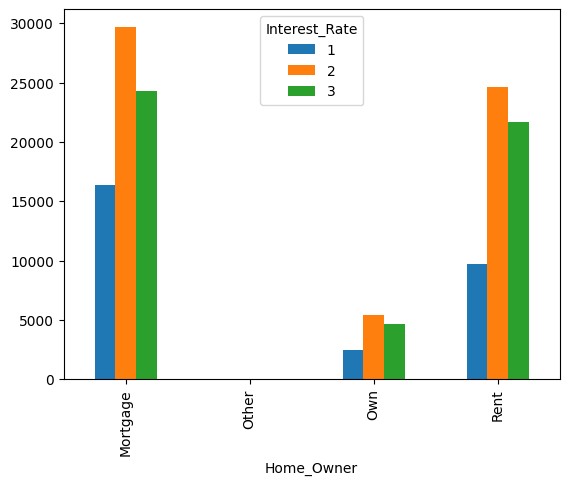

In [31]:
df.pivot_table(index = 'Home_Owner', columns ='Interest_Rate', values = 'Loan_ID', aggfunc = 'count').plot(kind='bar')

In [32]:
def completar_home_owner(x,y):
    if x == '':
        if y == 3:
            return "Rent"
        else: 
            return "Mortgage"
    else:
        return x

In [33]:
df['Home_Owner'] = df['Home_Owner'].replace(np.nan,'', regex=False)
df['Home_Owner']

0             Rent
1         Mortgage
2         Mortgage
3                 
4              Own
            ...   
164304        Rent
164305         Own
164306    Mortgage
164307        Rent
164308        Rent
Name: Home_Owner, Length: 164309, dtype: object

In [34]:
df['Home_Owner'] = df.apply(lambda x: completar_home_owner(x['Home_Owner'], x['Interest_Rate']), axis=1)

In [35]:
df.isnull().sum()

Loan_ID                      0
Loan_Amount_Requested        0
Length_Employed              0
Home_Owner                   0
Annual_Income            25102
Income_Verified              0
Purpose_Of_Loan              0
Debt_To_Income               0
Inquiries_Last_6Mo           0
Number_Open_Accounts         0
Total_Accounts               0
Gender                       0
Interest_Rate                0
dtype: int64

In [36]:
df['Annual_Income'].describe()

count    1.392070e+05
mean     7.333116e+04
std      6.037750e+04
min      4.000000e+03
25%      4.500000e+04
50%      6.300000e+04
75%      8.869750e+04
max      7.500000e+06
Name: Annual_Income, dtype: float64

(array([  355.,  2895.,  9548., 17083., 18589., 19395., 15868., 13505.,
        10396.,  5743.]),
 array([ 4000.  , 13599.99, 23199.98, 32799.97, 42399.96, 51999.95,
        61599.94, 71199.93, 80799.92, 90399.91, 99999.9 ]),
 <BarContainer object of 10 artists>)

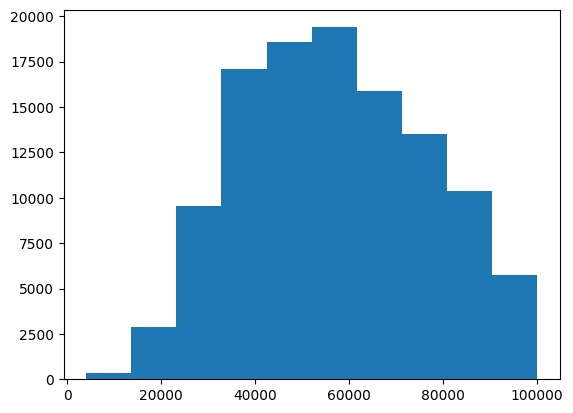

In [37]:
plt.hist(df[df['Annual_Income']<100000]['Annual_Income'], bins = 10)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Loan_ID                164309 non-null  int64  
 1   Loan_Amount_Requested  164309 non-null  float64
 2   Length_Employed        164309 non-null  float64
 3   Home_Owner             164309 non-null  object 
 4   Annual_Income          139207 non-null  float64
 5   Income_Verified        164309 non-null  object 
 6   Purpose_Of_Loan        164309 non-null  object 
 7   Debt_To_Income         164309 non-null  float64
 8   Inquiries_Last_6Mo     164309 non-null  int64  
 9   Number_Open_Accounts   164309 non-null  int64  
 10  Total_Accounts         164309 non-null  float64
 11  Gender                 164309 non-null  object 
 12  Interest_Rate          164309 non-null  int64  
dtypes: float64(5), int64(4), object(4)
memory usage: 16.3+ MB


In [39]:
df.loc[:,['Loan_Amount_Requested', 'Length_Employed', 'Annual_Income', 'Debt_To_Income', 'Inquiries_Last_6Mo', 'Number_Open_Accounts', 'Total_Accounts', 'Interest_Rate']].corr()['Annual_Income'].sort_values()

Debt_To_Income          -0.173589
Interest_Rate           -0.052783
Inquiries_Last_6Mo       0.060011
Length_Employed          0.070139
Number_Open_Accounts     0.145822
Total_Accounts           0.203237
Loan_Amount_Requested    0.280053
Annual_Income            1.000000
Name: Annual_Income, dtype: float64

In [40]:
av = df.loc[:,['Loan_Amount_Requested', 'Length_Employed', 'Annual_Income', 'Debt_To_Income', 'Inquiries_Last_6Mo', 'Number_Open_Accounts', 'Total_Accounts', 'Interest_Rate']].groupby('Total_Accounts').mean()['Annual_Income']
av

Total_Accounts
2.0       88617.400000
3.0       36087.616140
4.0       44522.606276
5.0       45691.847537
6.0       47686.809039
             ...      
99.0      97000.000000
102.0              NaN
105.0     38000.000000
116.0    240000.000000
156.0     42000.000000
Name: Annual_Income, Length: 100, dtype: float64

In [41]:
def completar_an_inc(x,y):
    if np.isnan(y):
        return av[x] 
    else:
        return y

In [42]:
df['Annual_Income'] = df.apply(lambda x: completar_an_inc(x['Total_Accounts'], x['Annual_Income']), axis=1)

df.isnull().sum()

Loan_ID                  0
Loan_Amount_Requested    0
Length_Employed          0
Home_Owner               0
Annual_Income            1
Income_Verified          0
Purpose_Of_Loan          0
Debt_To_Income           0
Inquiries_Last_6Mo       0
Number_Open_Accounts     0
Total_Accounts           0
Gender                   0
Interest_Rate            0
dtype: int64

In [43]:
df[df['Annual_Income'].isnull()] 

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
86968,10086969,24.0,7.0,Mortgage,NaN,VERIFIED - income,home_improvement,19.51,0,10,102.0,Male,3


In [44]:
df.dropna(inplace=True)

visualizamos antes de limpiar de todo

In [45]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Loan_ID,164308.0,1.008215e+07,47432.209880,10000001.0,10041077.75,1.008215e+07,1.012323e+07,10164309.00
Loan_Amount_Requested,164308.0,1.438348e+01,9.649422,1.0,8.00,1.207500e+01,2.000000e+01,950.00
Length_Employed,164308.0,5.990712e+00,3.548372,0.0,3.00,6.000000e+00,1.000000e+01,10.00
Annual_Income,164308.0,7.332921e+04,55796.901118,4000.0,48000.00,6.500000e+04,8.560164e+04,7500000.00
Debt_To_Income,164308.0,1.720718e+01,7.845104,0.0,11.37,1.684000e+01,2.278000e+01,39.99
Inquiries_Last_6Mo,164308.0,7.817027e-01,1.034748,0.0,0.00,0.000000e+00,1.000000e+00,8.00
Number_Open_Accounts,164308.0,1.119383e+01,4.991828,0.0,8.00,1.000000e+01,1.400000e+01,76.00
Total_Accounts,164308.0,2.506720e+01,11.581547,2.0,17.00,2.300000e+01,3.200000e+01,156.00
Interest_Rate,164308.0,2.158945e+00,0.738363,1.0,2.00,2.000000e+00,3.000000e+00,3.00


<Axes: xlabel='Interest_Rate', ylabel='count'>

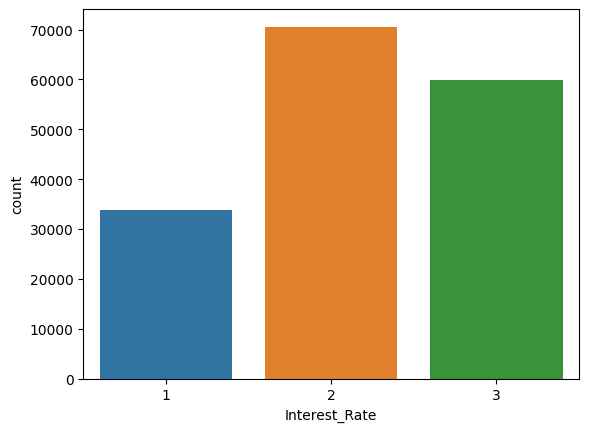

In [46]:
sns.countplot(x='Interest_Rate',data=df)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 164308 entries, 0 to 164308
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Loan_ID                164308 non-null  int64  
 1   Loan_Amount_Requested  164308 non-null  float64
 2   Length_Employed        164308 non-null  float64
 3   Home_Owner             164308 non-null  object 
 4   Annual_Income          164308 non-null  float64
 5   Income_Verified        164308 non-null  object 
 6   Purpose_Of_Loan        164308 non-null  object 
 7   Debt_To_Income         164308 non-null  float64
 8   Inquiries_Last_6Mo     164308 non-null  int64  
 9   Number_Open_Accounts   164308 non-null  int64  
 10  Total_Accounts         164308 non-null  float64
 11  Gender                 164308 non-null  object 
 12  Interest_Rate          164308 non-null  int64  
dtypes: float64(5), int64(4), object(4)
memory usage: 17.5+ MB


In [48]:
df_cual = df.select_dtypes(include=['object'])
df_cuan = df.select_dtypes(include=['float64','int64'])
df_cual.shape[1]+df_cuan.shape[1] == df.shape[1]

True

<Axes: >

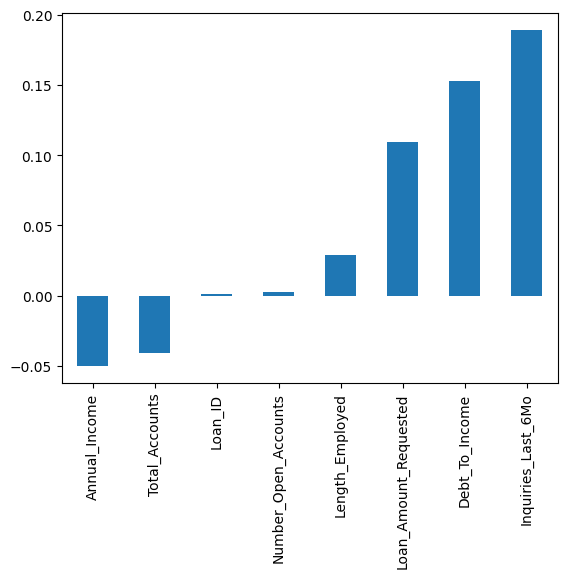

In [49]:
df_cuan.corr()['Interest_Rate'][:-1].sort_values().plot(kind='bar')

<Axes: xlabel='Interest_Rate', ylabel='Inquiries_Last_6Mo'>

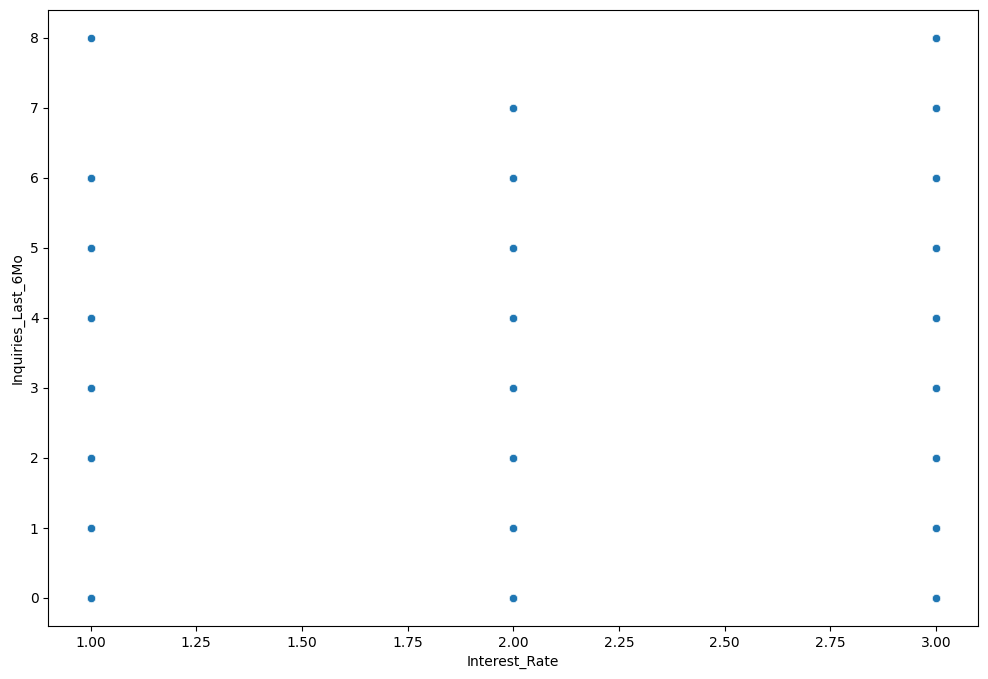

In [50]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Interest_Rate',y='Inquiries_Last_6Mo',data=df_cuan)

<Axes: xlabel='Gender'>

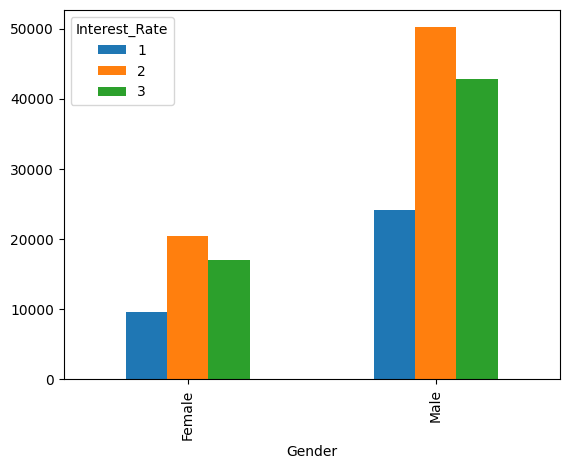

In [51]:
df.pivot_table(index="Gender", columns="Interest_Rate", values="Loan_ID", aggfunc="count").plot(kind="bar")

<Axes: xlabel='Purpose_Of_Loan'>

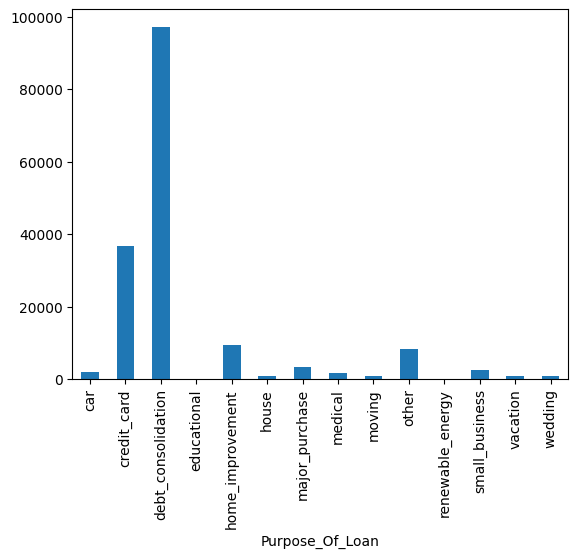

In [52]:
df.groupby("Purpose_Of_Loan").agg("count")["Interest_Rate"].plot(kind="bar")

Limpieza final

In [53]:
df_cuan.corr()['Interest_Rate'].sort_values() #Podríamos eliminar "Number_Open_Accounts", correlación muy baja

Annual_Income           -0.050086
Total_Accounts          -0.040741
Loan_ID                  0.001289
Number_Open_Accounts     0.002849
Length_Employed          0.029096
Loan_Amount_Requested    0.109633
Debt_To_Income           0.152470
Inquiries_Last_6Mo       0.188993
Interest_Rate            1.000000
Name: Interest_Rate, dtype: float64

In [54]:
df = df.drop(['Number_Open_Accounts','Loan_ID','Income_Verified'],axis=1)

transformamos categoricas

In [55]:
# Pensar si merece la pena realizar algún filtrado de datos si alguna categoría tiene 
# un contador muy bajo y así ahorramos columnas dummy
df['Home_Owner'].value_counts() 

Home_Owner
Mortgage    86381
Rent        65353
Own         12525
Other          49
Name: count, dtype: int64

In [56]:
#buscar concepto other, elimar del registro => sentido ok
print(df.shape[0])
df = df[df['Home_Owner'] != 'Other']
print(df.shape[0])
df['Home_Owner'].value_counts()

164308
164259


Home_Owner
Mortgage    86381
Rent        65353
Own         12525
Name: count, dtype: int64

In [57]:
df['Purpose_Of_Loan'].value_counts()

Purpose_Of_Loan
debt_consolidation    97081
credit_card           36670
home_improvement       9266
other                  8341
major_purchase         3432
small_business         2391
car                    1884
medical                1539
moving                  974
vacation                837
wedding                 828
house                   773
renewable_energy        123
educational             120
Name: count, dtype: int64

In [58]:
# Recategorizar  => sentido genetico ok
## - debt_consolidation    
## - credit_card           
## - home_improvement
## - other
## - significant_expenses = major_purchase + small_business + car + medical
## - life_events = moving + vacation + wedding + house + renewable_energy + educational
recategorization_map = {
    'major_purchase': 'significant_expenses',
    'small_business': 'significant_expenses',
    'car': 'significant_expenses',
    'medical': 'significant_expenses',
    'moving': 'life_events',
    'vacation': 'life_events',
    'wedding': 'life_events',
    'house': 'life_events',
    'renewable_energy': 'life_events',
    'educational': 'life_events'
}
df['Purpose_Of_Loan'] = df['Purpose_Of_Loan'].replace(recategorization_map)
df['Purpose_Of_Loan'].value_counts()

Purpose_Of_Loan
debt_consolidation      97081
credit_card             36670
home_improvement         9266
significant_expenses     9246
other                    8341
life_events              3655
Name: count, dtype: int64

In [59]:
df['Gender'].value_counts()

Gender
Male      117143
Female     47116
Name: count, dtype: int64

In [60]:
#Transformar 'Home_Owner'
dummies = pd.get_dummies(df[['Home_Owner', 'Purpose_Of_Loan','Gender']]) 
#se puede añadir drop_first=True evita redundancia y evita crear una columna por cada variable

In [61]:
df_post = pd.concat([df,dummies],axis=1)
df_post = df_post.drop(['Home_Owner', 'Purpose_Of_Loan','Gender'],axis=1) #Eliminamos las columnas originales

In [62]:
df_post.info()

<class 'pandas.core.frame.DataFrame'>
Index: 164259 entries, 0 to 164308
Data columns (total 18 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Loan_Amount_Requested                 164259 non-null  float64
 1   Length_Employed                       164259 non-null  float64
 2   Annual_Income                         164259 non-null  float64
 3   Debt_To_Income                        164259 non-null  float64
 4   Inquiries_Last_6Mo                    164259 non-null  int64  
 5   Total_Accounts                        164259 non-null  float64
 6   Interest_Rate                         164259 non-null  int64  
 7   Home_Owner_Mortgage                   164259 non-null  bool   
 8   Home_Owner_Own                        164259 non-null  bool   
 9   Home_Owner_Rent                       164259 non-null  bool   
 10  Purpose_Of_Loan_credit_card           164259 non-null  bool   
 11  Purpo

tarin-test

In [63]:
X = df_post.drop('Interest_Rate',axis=1).values
y = df_post['Interest_Rate']

In [64]:
y.info()

<class 'pandas.core.series.Series'>
Index: 164259 entries, 0 to 164308
Series name: Interest_Rate
Non-Null Count   Dtype
--------------   -----
164259 non-null  int64
dtypes: int64(1)
memory usage: 2.5 MB


In [65]:
y

0         1
1         3
2         3
3         3
4         1
         ..
164304    2
164305    2
164306    1
164307    3
164308    2
Name: Interest_Rate, Length: 164259, dtype: int64

In [66]:
y = pd.get_dummies(y) #la dumificamos... 

In [67]:
y

,1,2,3
0,True,False,False
1,False,False,True
2,False,False,True
3,False,False,True
4,True,False,False
...,...,...,...
164304,False,True,False
164305,False,True,False
164306,True,False,False
164307,False,False,True


In [68]:
y = y.values
y

array([[ True, False, False],
       [False, False,  True],
       [False, False,  True],
       ...,
       [ True, False, False],
       [False, False,  True],
       [False,  True, False]])

In [69]:
y = y.astype(np.uint8)
y

array([[1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0]], dtype=uint8)

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [72]:
print(f"X_train.shape={X_train.shape}\nX_test.shape={X_test.shape}")

X_train.shape=(123194, 17)
X_test.shape=(41065, 17)


In [73]:
X_train

array([[10.0, 4.0, 26000.0, ..., False, False, True],
       [5.0, 5.8460328556448795, 65782.30881465517, ..., False, False,
        True],
       [4.8, 2.0, 60000.0, ..., False, False, True],
       ...,
       [15.0, 10.0, 110000.0, ..., True, True, False],
       [4.025, 3.0, 34000.0, ..., False, False, True],
       [9.0, 4.0, 40000.0, ..., False, True, False]], dtype=object)

In [74]:
X_test

array([[15.0, 2.0, 88000.0, ..., False, True, False],
       [1.45, 1.0, 72515.0, ..., False, True, False],
       [17.6, 10.0, 50000.0, ..., False, True, False],
       ...,
       [31.2, 10.0, 73800.0, ..., False, False, True],
       [8.0, 8.0, 52000.0, ..., False, False, True],
       [17.6, 10.0, 48000.0, ..., False, False, True]], dtype=object)

Escalado

In [75]:
from sklearn.preprocessing import MinMaxScaler

In [76]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [77]:
X_test

array([[2.80561122e-02, 2.00000000e-01, 2.15103445e-02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [9.01803607e-04, 1.00000000e-01, 1.75355511e-02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [3.32665331e-02, 1.00000000e+00, 1.17562503e-02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [6.05210421e-02, 1.00000000e+00, 1.78653935e-02, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.40280561e-02, 8.00000000e-01, 1.22696237e-02, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [3.32665331e-02, 1.00000000e+00, 1.12428769e-02, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [78]:
X_train

array([[0.00948367, 0.4       , 0.0029349 , ..., 0.        , 0.        ,
        1.        ],
       [0.00421496, 0.58460329, 0.00824204, ..., 0.        , 0.        ,
        1.        ],
       [0.00400421, 0.2       , 0.00747065, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.01475237, 1.        , 0.01414088, ..., 1.        , 1.        ,
        0.        ],
       [0.00318757, 0.3       , 0.00400213, ..., 0.        , 0.        ,
        1.        ],
       [0.00842993, 0.4       , 0.00480256, ..., 0.        , 1.        ,
        0.        ]])

In [79]:
print(f"X_train.shape={X_train.shape}\nX_test.shape={X_test.shape}")

X_train.shape=(123194, 17)
X_test.shape=(41065, 17)


Modelaje

In [97]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [81]:
num_neuronas = X_train.shape[1]
num_neuronas_salida=len(df["Interest_Rate"].unique())

In [82]:
# 17 >0.35> 11 >0.3>  8 >0.3> 5 >0.2> 3
model = Sequential() 
model.add(Dense(units = int(num_neruonas),activation='relu'))
model.add(Dropout(0.35))
model.add(Dense(units = int(11),activation='relu'))
model.add(Dropout(0.35))
model.add(Dense(units = int(np.round(num_neruonas/2)),activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units = int(5),activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units = int(num_nuronas_final),activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['categorical_accuracy'])

#model = Sequential()
#model.add(Dense(units=int(num_neuronas), activation='relu'))
#model.add(Dropout(0.3))
#model.add(Dense(units=int(np.round(num_neuronas / 2)), activation='relu'))
#model.add(Dropout(0.2))
#model.add(Dense(units=int(num_neuronas_salida), activation='softmax'))
#model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['categorical_accuracy'])
#model.summary()

In [83]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [84]:
#early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
#model.fit(x=X_train, 
#          y=y_train, 
#          epochs=600,
#          batch_size=50,
#          validation_data=(X_test, y_test), verbose=1,
#          callbacks=[early_stop]
#          )
model.fit(x=X_train, 
          y=y_train, 
          epochs=200,
          batch_size=100,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - categorical_accuracy: 0.4204 - loss: 1.0697 - val_categorical_accuracy: 0.4810 - val_loss: 1.0142
Epoch 2/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - categorical_accuracy: 0.4793 - loss: 1.0184 - val_categorical_accuracy: 0.4930 - val_loss: 0.9952
Epoch 3/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - categorical_accuracy: 0.4884 - loss: 1.0011 - val_categorical_accuracy: 0.4942 - val_loss: 0.9867
Epoch 4/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - categorical_accuracy: 0.4910 - loss: 0.9958 - val_categorical_accuracy: 0.4974 - val_loss: 0.9837
Epoch 5/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - categorical_accuracy: 0.4962 - loss: 0.9907 - val_categorical_accuracy: 0.4987 - val_loss: 0.9810
Epoch 6/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - categorical_accuracy: 0.4970 - loss: 0.9902 - val_categorical_accuracy: 0.5001 - val_loss: 0.9791
Epoch 7/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - categorical_accuracy: 0.496

<Axes: >

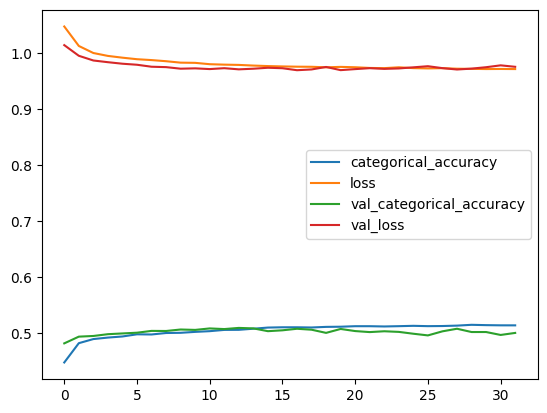

In [85]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [86]:
prediccion = model.predict(X_test)
prediccion

1284/1284 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.18366215, 0.41170144, 0.40463644],
       [0.45957652, 0.46494925, 0.07547425],
       [0.10542608, 0.32704723, 0.5675267 ],
       ...,
       [0.13658768, 0.35338396, 0.5100284 ],
       [0.38157764, 0.47328758, 0.14513476],
       [0.07134698, 0.3416558 , 0.5869973 ]], dtype=float32)

In [87]:
y_test

array([[0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0]], dtype=uint8)

In [88]:
prediccion_lab = np.argmax(prediccion, axis=1)
prediccion_lab

array([1, 1, 2, ..., 2, 1, 2], dtype=int64)

In [89]:
prediccion_lab_real = prediccion_lab + 1
prediccion_lab

array([1, 1, 2, ..., 2, 1, 2], dtype=int64)

In [90]:
df_test_lab = pd.DataFrame(y_test, columns = ['Interest Rate 1','Interest Rate 2','Interest Rate 3'])
df_test_lab

,Interest Rate 1,Interest Rate 2,Interest Rate 3
0,0,0,1
1,0,1,0
2,0,0,1
3,0,0,1
4,1,0,0
...,...,...,...
41060,0,1,0
41061,0,1,0
41062,0,0,1
41063,0,0,1


In [91]:
df_test_lab["Clase Real"]=np.where(df_test_lab["Interest Rate 1"]==1,1,np.where(df_test_lab["Interest Rate 2"]==1,2,3))
df_test_lab["Clase Real"]

0        3
1        2
2        3
3        3
4        1
        ..
41060    2
41061    2
41062    3
41063    3
41064    2
Name: Clase Real, Length: 41065, dtype: int32

In [92]:
clases=[1, 2, 3]
array_clase_real = df_test_lab["Clase Real"].to_numpy()
array_clase_real

array([3, 2, 3, ..., 3, 3, 2])

In [94]:
cnf_matrix = confusion_matrix(array_clase_real, prediccion_lab_real, labels=clases)
cnf_matrix

array([[  148,  5954,  2474],
       [  120, 10252,  7192],
       [   20,  4786, 10119]], dtype=int64)

In [95]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: https://datascience.stackexchange.com/questions/40067/confusion-matrix-three-classes-python/40068
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix sin normalizar')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix sin normalizar
[[  148  5954  2474]
 [  120 10252  7192]
 [   20  4786 10119]]


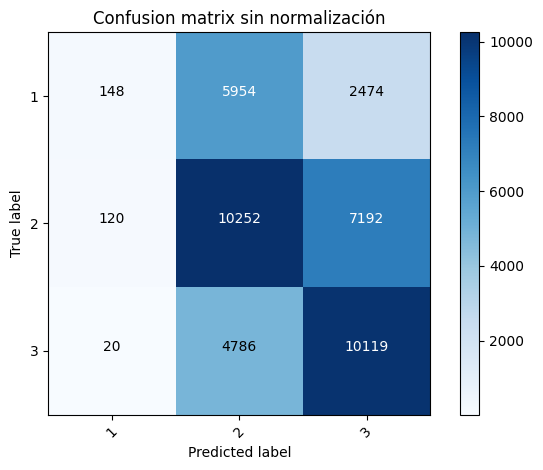

In [96]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clases, title='Confusion matrix sin normalización')

In [99]:
clases = ['Clase 1', 'Clase 2', 'Clase 3']

# Calcular y mostrar la matriz de confusión
cnf_matrix = confusion_matrix(array_clase_real, prediccion_lab_real)
print("Confusion Matrix:\n", cnf_matrix)

# Calcular y mostrar el reporte de clasificación
report = classification_report(array_clase_real, prediccion_lab_real, target_names=clases)
print("\nClassification Report:\n", report)

# Calcular y mostrar la exactitud
accuracy = accuracy_score(array_clase_real, prediccion_lab_real)
print("\nAccuracy:\n", accuracy)

Confusion Matrix:
 [[  148  5954  2474]
 [  120 10252  7192]
 [   20  4786 10119]]

Classification Report:
               precision    recall  f1-score   support

     Clase 1       0.51      0.02      0.03      8576
     Clase 2       0.49      0.58      0.53     17564
     Clase 3       0.51      0.68      0.58     14925

    accuracy                           0.50     41065
   macro avg       0.50      0.43      0.38     41065
weighted avg       0.50      0.50      0.45     41065


Accuracy:
 0.49967125289175696
